In [3]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torch
import os
from PIL import Image
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F 

In [14]:
def test(test_loader,model,direct):
    print('Resume model: %s' % direct)
    model_test = model.to(computing_device)
    check_point = torch.load(direct)
    model_test.load_state_dict(check_point['state_dict'])
    output_all = []
    labels_all = []
    
    for mb_count, (test_images, test_labels) in enumerate(test_loader, 0):
        with torch.no_grad():      
            test_images, test_labels = test_images.to(computing_device), test_labels.to(computing_device)
            test_images = torch.squeeze(torch.stack([test_images,test_images,test_images], dim=1, out=None))
            outputs = model_test(test_images)
        print(mb_count)
        outputs = np.argmax(outputs.cpu().detach().numpy(), axis=1)
        test_labels = np.argmax(test_labels.cpu().detach().numpy(),axis=1)
        output_all.append(list(outputs))
        labels_all.append(list(test_labels))   
    print("test finish")
    return output_all, labels_all



In [15]:
from quickdraw_dataloader import create_split_loaders

# Setup: initialize the hyperparameters/variables
num_epochs = 1           # Number of full passes through the dataset
batch_size = 128          # Number of samples in each minibatch
learning_rate = 0.001  
seed = np.random.seed(0) # Seed the random number generator for reproducibility
p_val = 0.0001              # Percent of the overall dataset to reserve for validation
p_test = 0.2             # Percent of the overall dataset to reserve for testing

#TODO: Convert to Tensor - you can later add other transformations, such as Scaling here
transform = transforms.Compose([
        #transforms.RandomResizedCrop(224),
        transforms.ToPILImage('L'),
        transforms.Resize([224,224],interpolation=2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# Check if your system supports CUDA
use_cuda = torch.cuda.is_available()

# Setup GPU optimization if CUDA is supported
if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: # Otherwise, train on the CPU
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")
root_dir = "./data_subset/"
# Setup the training, validation, and testing dataloaders
train_loader, val_loader, test_loader = create_split_loaders(root_dir,batch_size, seed, transform=transform, 
                                                             p_val=p_val, p_test=p_test,
                                                             shuffle=True, show_sample=False, 
                                                             extras=extras)




CUDA is supported


In [16]:
direct = './checkpoint/1_model_epoch5000.pth'
import torchvision.models as models
model = models.resnet34(pretrained=True)
model.fc = nn.Sequential(nn.Linear(512, 345))
model = model.to(computing_device)
outputall, labelall = test(test_loader,model,direct)


Resume model: ./checkpoint/1_model_epoch5000.pth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
2

In [36]:
def load_label_matrix(label_dir = "labels.txt"):
    f = open(label_dir,"r")
    # And for reading use
    classes = f.read()
    f.close()
    classes_list = classes.split('\n')

    label_list = classes_list[1::2]
    return label_list

In [21]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




[199,
 169,
 55,
 287,
 225,
 339,
 196,
 232,
 48,
 143,
 309,
 338,
 36,
 81,
 115,
 246,
 22,
 189,
 198,
 192,
 271,
 96,
 35,
 71,
 116,
 212,
 203,
 97,
 58,
 77,
 236,
 74,
 260,
 26,
 101,
 179,
 52,
 335,
 329,
 329,
 158,
 305,
 47,
 207,
 270,
 152,
 71,
 146,
 273,
 319,
 63,
 259,
 255,
 52,
 199,
 267,
 291,
 230,
 286,
 25,
 343,
 19,
 162,
 10,
 76,
 163,
 295,
 24,
 169,
 220,
 198,
 195,
 57,
 18,
 104,
 270,
 23,
 290,
 241,
 14,
 36,
 65,
 66,
 344,
 129,
 301,
 160,
 181,
 0,
 68,
 163,
 191,
 84,
 105,
 265,
 335,
 132,
 311,
 92,
 309,
 333,
 321,
 260,
 333,
 285,
 331,
 106,
 190,
 2,
 250,
 169,
 144,
 127,
 5,
 336,
 3,
 56,
 145,
 72,
 334,
 220,
 199,
 63,
 35,
 65,
 339,
 271,
 183,
 161,
 214,
 126,
 17,
 71,
 174,
 35,
 239,
 314,
 50,
 109,
 296,
 261,
 274,
 108,
 197,
 71,
 116,
 285,
 116,
 93,
 241,
 86,
 136,
 187,
 43,
 235,
 128,
 231,
 342,
 99,
 163,
 138,
 296,
 76,
 241,
 174,
 248,
 51,
 243,
 147,
 101,
 279,
 320,
 61,
 35,
 68,
 75,
 107,

In [28]:
labelall = [item for sublist in labelall for item in sublist]
outputall = [item for sublist in outputall for item in sublist]

TypeError: 'numpy.int64' object is not iterable

In [30]:
labelall = np.array(labelall)
outputall = np.array(outputall)

Normalized confusion matrix
[[0.64 0.   0.   ... 0.   0.   0.  ]
 [0.   0.57 0.   ... 0.   0.   0.  ]
 [0.   0.   0.61 ... 0.   0.   0.03]
 ...
 [0.   0.   0.   ... 0.36 0.   0.  ]
 [0.   0.   0.   ... 0.   0.45 0.  ]
 [0.   0.   0.01 ... 0.   0.   0.85]]


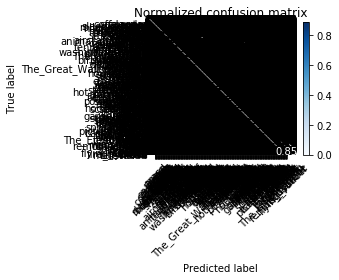

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(labelall,outputall)
np.set_printoptions(precision=2)

class_names = load_label_matrix()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [44]:
for i in range(len(class_names)):
    print(class_names[i],(cnf_matrix[i,i]*1.0/np.sum(cnf_matrix[i])))

coffee_cup 0.6425855513307985
calendar 0.5704225352112676
computer 0.6130742049469965
grass 0.7775700934579439
angel 0.7299813780260708
sleeping_bag 0.4312617702448211
diamond 0.8256227758007118
roller_coaster 0.4880952380952381
horse 0.4032258064516129
bridge 0.6660447761194029
hockey_puck 0.4766536964980545
paint_can 0.6072727272727273
motorbike 0.755877034358047
dolphin 0.4630738522954092
eye 0.7393715341959335
compass 0.7145454545454546
mug 0.40217391304347827
river 0.5963963963963964
skyscraper 0.7588652482269503
microphone 0.7250996015936255
oven 0.3172905525846702
soccer_ball 0.6721915285451197
cruise_ship 0.506398537477148
tractor 0.6486988847583643
mountain 0.7876588021778584
parrot 0.5073260073260073
drums 0.6543438077634011
dog 0.21361058601134217
smiley_face 0.6678765880217786
car 0.2222222222222222
octopus 0.7644991212653779
banana 0.5276190476190477
lighter 0.8023255813953488
kangaroo 0.7402135231316725
drill 0.7218181818181818
bathtub 0.41353383458646614
purse 0.60886319

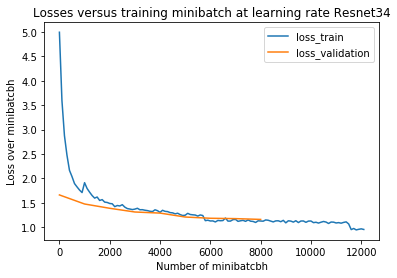

In [55]:
import numpy as np 
import numpy as np
import pickle
import copy
import matplotlib.pyplot as plt
import statistics
from os import listdir
from PIL import Image
N=100
M=1000
def display_loss(loss_train,loss_vali):
    epc_train= []
    for i in range(len(loss_train)):
        epc_train.append(N*i)
    epc_val= []
    for i in range(len(loss_vali)):
        epc_val.append(M*i)
    plt.plot(epc_train, loss_train, label='loss_train')
    plt.plot(epc_val, loss_vali, label='loss_validation')
    plt.title('Losses versus training minibatch at learning rate Resnet34')
    plt.xlabel('Number of minibatcbh')
    plt.ylabel('Loss over minibatcbh')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
    plt.show()
loss_train = np.load('avg_minibatch_loss_new.npy')
loss_val = np.load('total_vali_loss_new.npy')
display_loss(loss_train,loss_val[0:-1])

In [52]:
loss_val.shape

(122,)

In [53]:
loss_train.shape

(10,)